# Проект "Определение перспективного тарифа для телеком компании"

## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


Описание тарифов


#### Тариф «Смарт» (Smart)

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра» (Ultra)

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Данные разделены на таблицы. Просмотрим что за информация у нас есть в них.

##### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

##### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

##### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

##### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

##### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то - со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) 

### План работы над проектом

1. Просмотреть каждую таблицу и выявить аномалии и связи между таблицами
2. Составить общую таблицу данных о пользователях сети
3. Заполнить пропуски и сменить типы данных для столцов
4. Добавить необходимые столбцы для гипотез
5. Провести сравнительный анализ пользователей тарифов 
6. Проверить гипотезы на возможное соотвествие
7. Оформить проект и составить общий вывод

## Шаг 1. Открытие файлов с данными и изучение общей информации

Подключение необходимых библиотек.

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

Сохранение каждой таблицы по отдельности и вывод общей информации по ним.

Начнем с таблицы data_users.

In [2]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [5]:
check_columns(data_users)

Уникальные значения столбца user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 

In [6]:
data_users['churn_date'].value_counts()

2018-12-03    2
2018-12-21    2
2018-12-09    2
2018-10-03    2
2018-10-14    2
2018-11-30    1
2018-12-30    1
2018-12-26    1
2018-11-21    1
2018-12-11    1
2018-12-25    1
2018-12-16    1
2018-12-18    1
2018-11-27    1
2018-12-20    1
2018-10-05    1
2018-11-07    1
2018-11-16    1
2018-08-17    1
2018-12-23    1
2018-10-25    1
2018-08-31    1
2018-12-14    1
2018-09-26    1
2018-10-28    1
2018-11-26    1
2018-09-02    1
2018-10-04    1
2018-09-27    1
2018-11-13    1
2018-10-27    1
2018-11-22    1
2018-12-24    1
Name: churn_date, dtype: int64

In [7]:
data_users['reg_date'].value_counts()

2018-05-28    8
2018-04-03    5
2018-11-16    5
2018-01-04    5
2018-07-16    5
             ..
2018-10-21    1
2018-08-31    1
2018-01-25    1
2018-02-24    1
2018-06-04    1
Name: reg_date, Length: 270, dtype: int64

#### Вывод по таблице data_users

Определим типы переменных для столбцов.

- Категориальная переменная: user_id, churn_date, city, first_name, last_name, reg_date, tariff.
- Количественная переменная: age.

По сути последний user_id отражает, сколько всего было зарегистрированно пользователей. Новый пользователь получает номер n+1 от предыдущего.

По данным не было найденно аномалий. Столбец churn_date	имеет пропуски, т.к. если пользователь до сих пор продолжает пользоваться тарифом, то нет даты расторжения договора об услуге. Это было описано в задании.

Таблица data_calls.

In [8]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
check_columns(data_calls)

Уникальные значения столбца id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
Уникальные значения столбца call_date
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-

In [11]:
#difference = set(list(data_calls['user_id'].unique())) - set(list(data_users['user_id'].unique()))
#set1 = set(data_calls['user_id'].unique())
#set2 = set(data_users['user_id'].unique())
#difference = set1 - set2
#difference = set2 - set1
#difference

def difference_between_series(serie_1, serie_2):
    set_1 = set(serie_1)
    set_2 = set(serie_2)
    left_diff = set_1 - set_2
    right_diff = set_2 - set_1
    if left_diff:
        print('В втором наборе нет следующих значений:', left_diff)
        print('Количество несовпадающих элементов:', len(left_diff))
    else:
        print('Все значения второго набора есть в первом.')
    if right_diff:
        print('В первом наборе нет следующих значений:', right_diff)
        print('Количество несовпадающих элементов:', len(right_diff))
    else:
        print('Все значения первого набора есть в во втором.')

In [12]:
difference_between_series(data_users['user_id'].unique(), data_calls['user_id'].unique())

В втором наборе нет следующих значений: {1473, 1091, 1128, 1231, 1328, 1489, 1106, 1371}
Количество несовпадающих элементов: 8
Все значения первого набора есть в во втором.


In [13]:
data_calls[data_calls['user_id'] == 1473]

,id,call_date,duration,user_id


#### Вывод по таблице data_calls

Определим типы переменных для столбцов.

- Категориальная переменная: id, call_date, user_id.
- Количественная переменная: duration.

Столбец id состоит из данных столбца user_id. Число после _ отображает номер разговора.

Столбец duration имеет нулевые значения. Возможно это потеря информации о длительности звонка в минутах.

В столбце user_id таблицы data_calls отстувуют некоторые индификаторы пользователя. Это означает, что пользователи под id 1473, 1091, 1128, 1231, 1328, 1489, 1106, 1371 не делали звонков. 8 пользователям возможно это не требуется.

Таблица data_messages.

In [14]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [16]:
check_columns(data_messages)

Уникальные значения столбца id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
Уникальные значения столбца message_date
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '20

In [17]:
difference_between_series(data_users['user_id'].unique(), data_messages['user_id'].unique())

В втором наборе нет следующих значений: {1024, 1152, 1153, 1157, 1162, 1290, 1291, 1292, 1040, 1297, 1428, 1301, 1429, 1175, 1049, 1177, 1179, 1305, 1053, 1306, 1435, 1185, 1442, 1063, 1322, 1195, 1456, 1201, 1204, 1078, 1334, 1208, 1462, 1210, 1339, 1466, 1085, 1469, 1220, 1095, 1224, 1225, 1479, 1228, 1101, 1360, 1107, 1363, 1494, 1367, 1240, 1114, 1242, 1116, 1117, 1118, 1370, 1120, 1248, 1371, 1376, 1254, 1255, 1128, 1001, 1129, 1132, 1260, 1006, 1388, 1010, 1397, 1143, 1017}
Количество несовпадающих элементов: 74
Все значения первого набора есть в во втором.


In [18]:
data_messages[data_messages['user_id'] == 1024]

,id,message_date,user_id


#### Вывод по таблице data_messages

Определим типы переменных для столбцов.

- Категориальная переменная: id, message_date, user_id.

Столбец id состоит из данных столбца user_id. Число после _ отображает номер сообщения.

В столбце user_id таблицы data_calls отстувуют некоторые индификаторы пользователя. Это означает, что 74 пользователя не используют сообщения.

Таблица data_internet.

In [19]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [21]:
check_columns(data_internet)

Уникальные значения столбца Unnamed: 0
[     0      1      2 ... 149393 149394 149395]
Уникальные значения столбца id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
Уникальные значения столбца mb_used
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
Уникальные значения столбца session_date
['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03

In [22]:
data_internet[data_internet['mb_used'] == 0]

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [23]:
difference_between_series(data_users['user_id'].unique(), data_internet['user_id'].unique())

В втором наборе нет следующих значений: {1128, 1273, 1371}
Количество несовпадающих элементов: 3
Все значения первого набора есть в во втором.


In [24]:
data_internet = data_internet.loc[:, 'id':'user_id']
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


#### Вывод по таблице data_internet

Определим типы переменных для столбцов.

- Категориальная переменная: id, session_date, user_id.
- Количественная переменная: mb_used.

Столбец id состоит из данных столбца user_id. Число после _ отображает номер сессии.

Пропуски в столбце mb_used говорят об потере данных.

В столбце user_id таблицы data_calls отстувуют некоторые индификаторы пользователя. Это означает, что 3 пользователя не используют интернет.

Таблица data_tariffs.

In [25]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [26]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод по таблице data_tariffs

Определим типы переменных для столбцов.

- Категориальная переменная: tariff_name.
- Количественная переменная: messages_included, mb_per_month_included, minutes_included, rub_monthly_fee, rub_per_gb, rub_per_message, rub_per_minute.

В этой таблице все хорошо. Данные из нее потребуются для выполнения поставленной задачи.

### Вывод по шагу 1

Данные имеют несколько аномалий:

- отсутствие информации о длительности разговорной сессии.
- отсутствие информации об использованнном трафике интернета за сессиию.

При загрузке таблицы data_internet иногда появляется столбец, дублирующий индекс.

В целом c данными можно работать и строить гипотезы.

## Шаг 2. Подготовка данных

### Решение по пропускам

Столбцы с пустыми значениями в mb_used и duration. Изучим каков процент пустых значений в каждой таблице.

In [27]:
print('Пустые значения в столбце duration: {:.2%}'.format(
    data_calls[data_calls['duration'] == 0].count()[0]/data_calls.shape[0]))
print('Пустые значения в столбце mb_used: {:.2%}'.format(
    data_internet[data_internet['mb_used'] == 0].count()[0]/data_internet.shape[0]))

Пустые значения в столбце duration: 19.55%
Пустые значения в столбце mb_used: 13.12%


Исходя из количества нулевых значений и метода оценки стоимости услуги все такие значения будт заменены на минимальный расход по данной услуге: для duration - это 1 минута, для mb_used - 1 МБ. 

Это компромисное решение между пользователем услуги и компанией. 

1. Потеря данных о длительности разговора или о потраченных мегабайтах - недочет программы-аггрегатора компании.
2. Если заполнять нулевые значения среднимим или медианными по пользователю может получиться, что на стороне пользователя может появиться претензия о перерасходе лимита пакета и оплата тех минут, СМС или МБ. Когда по факту он мог и не приблизиться к порогу.
3. Эти параметры завязаны на расчете стоимости услуги. Соотвественно оставить 0 может привести к снижению доходности компании.

In [28]:
data_calls.loc[data_calls['duration'] == 0,'duration'] = 1
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [29]:
data_internet.loc[data_internet['mb_used'] == 0,'mb_used'] = 1
data_internet.loc[11,:]

id                 1000_11
mb_used                  1
session_date    2018-08-28
user_id               1000
Name: 11, dtype: object

### Изменение типа данных

В таблице data_users изменение типа требуют только столбцы с датой.

In [30]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В таблице data_calls изменение требует столбец даты и столбец длительность. Для подсчета тарифа важны минуты, округленные вверх.

In [31]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls['duration'] = pd.to_numeric(data_calls['duration'], downcast='integer')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int8
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(1), int8(1), object(1)
memory usage: 4.8+ MB


В таблице data_messages изменение типа требует столбец даты.

In [32]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


В таблице data_internet изменение требует столбец даты и столбец трафика. Для подсчета тарифа важны мегабайты, округленные вверх.

In [33]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)
data_internet['mb_used'] = pd.to_numeric(data_internet['mb_used'], downcast='integer')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int16(1), int64(1), object(1)
memory usage: 3.7+ MB


В таблице data_tariffs изменениея не требуются.

Проверим по датам, сколько месяцев охватывают данные.

In [34]:
print(data_users['reg_date'].min(), data_users['reg_date'].max())
print(data_calls['call_date'].min(), data_calls['call_date'].max())
print(data_messages['message_date'].min(), data_messages['message_date'].max())
print(data_internet['session_date'].min(), data_internet['session_date'].max())

2018-01-01 00:00:00 2018-12-31 00:00:00
2018-01-01 00:00:00 2018-12-31 00:00:00
2018-01-02 00:00:00 2018-12-31 00:00:00
2018-01-01 00:00:00 2018-12-31 00:00:00


По данным получается что охватывается весь 2018 год. Значит рассматриваемый период - 12 месяцев.

Поочередно составим в каждой таблице столбец месяца и свернем их в pivot table.

In [35]:
def fill_month(row):
    return row.month

data_calls['month'] = data_calls['call_date'].apply(fill_month)
print(data_calls.head())

data_messages['month'] = data_messages['message_date'].apply(fill_month)
print(data_messages.head())

data_internet['month'] = data_internet['session_date'].apply(fill_month)
print(data_internet.head())

       id  call_date  duration  user_id  month
0  1000_0 2018-07-25         1     1000      7
1  1000_1 2018-08-17         1     1000      8
2  1000_2 2018-06-11         3     1000      6
3  1000_3 2018-09-21        14     1000      9
4  1000_4 2018-12-15         6     1000     12
       id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8
3  1000_3   2018-06-16     1000      6
4  1000_4   2018-12-05     1000     12
       id  mb_used session_date  user_id  month
0  1000_0      113   2018-11-25     1000     11
1  1000_1     1053   2018-09-07     1000      9
2  1000_2     1198   2018-06-25     1000      6
3  1000_3      551   2018-08-22     1000      8
4  1000_4      303   2018-09-24     1000      9


In [36]:
data_calls_pivot = pd.pivot_table(data_calls, index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])
data_calls_pivot.columns = ['calls_count', 'all_calls_duration']
data_calls_pivot['all_calls_duration'] = pd.to_numeric(data_calls_pivot['all_calls_duration'], downcast='integer')
data_calls_pivot

calls_count  all_calls_duration
user_id month                                 
1000    5               22                 164
        6               43                 187
        7               47                 346
        8               52                 418
        9               58                 478
...                    ...                 ...
1498    10              41                 258
1499    9                9                  71
        10              68                 473
        11              74                 624
        12              69                 505

[3174 rows x 2 columns]

In [37]:
data_messages_pivot = pd.pivot_table(data_messages, index=['user_id', 'month'], values='id', aggfunc='count')
data_messages_pivot.columns = ['messages_count']
data_messages_pivot

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [38]:
data_internet_pivot = pd.pivot_table(data_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
data_internet_pivot.columns = ['traffic_mb']
data_internet_pivot['traffic_mb'] = pd.to_numeric(data_internet_pivot['traffic_mb'], downcast='integer')
data_internet_pivot

traffic_mb
user_id month            
1000    5            2257
        6           23262
        7           14017
        8           14072
        9           14583
...                   ...
1498    10          20614
1499    9            1849
        10          17824
        11          17994
        12          13082

[3203 rows x 1 columns]

Соберем данные в одну таблицу. Создадим 12 столбцов для каждого месяца.

В каждый стобец будет занесен словарь:

- calls_count - количество звонков за месяц.
- all_calls_duration - время в минутах всех звонков за месяц.
- messages_count - количество сообщений за месц
- traffic_mb - использованный трафик в мегабайтах за месяц.
- subscription_fee - абонентская плата по тарифу за месяц.

In [39]:
#Фрагмен кода для заполнения данных по месяцам у пользователей
user_id = 1000
index = data_calls_pivot.index
index

for i in index:
    if user_id in i:
        print(data_calls_pivot.loc[(user_id, i[1]), 'calls_count'])

22
43
47
52
58
57
43
46


In [40]:
#Фрагмен кода для пользователей, которые расторгнули договор
data_users[data_users['churn_date'] >= pd.Timestamp('2018-01-01')].head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [41]:
user_id = 1056
index = data_calls_pivot.index
index

for i in index:
    if user_id in i:
        print(data_calls_pivot.loc[(user_id, i[1]), :])

calls_count            32
all_calls_duration    203
Name: (1056, 4), dtype: int64
calls_count            55
all_calls_duration    469
Name: (1056, 5), dtype: int64
calls_count            42
all_calls_duration    385
Name: (1056, 6), dtype: int64
calls_count            55
all_calls_duration    436
Name: (1056, 7), dtype: int64
calls_count            55
all_calls_duration    321
Name: (1056, 8), dtype: int64
calls_count            50
all_calls_duration    353
Name: (1056, 9), dtype: int64
calls_count            23
all_calls_duration    147
Name: (1056, 10), dtype: int64


В данных отключившихся пользователей присутсвуют только месяцы, когда они пользовались услугами.

In [42]:
data_users[data_users['reg_date'] < pd.Timestamp('2018-02-01')].head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
32,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart
45,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart
55,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart
71,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart
113,1113,52,NaT,Чита,Харитон,Булгаков,2018-01-24,smart
120,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra
126,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra
134,1134,65,NaT,Красноярск,Марьяна,Авросимова,2018-01-16,smart
135,1135,64,NaT,Архангельск,Милена,Воронина,2018-01-29,smart


In [43]:
data_tariffs.info()
data_messages_pivot.loc[(1000, 5), :][0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


22

In [44]:
full_data_users = data_users
full_data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [45]:
calls_index = data_calls_pivot.index
messages_index = data_messages_pivot.index
internet_index = data_internet_pivot.index
tariff_smart = data_tariffs.loc[0,:]
tariff_ultra = data_tariffs.loc[1,:]
tariff_dict = {'ultra':[tariff_ultra[0], 
                        tariff_ultra[1], 
                        tariff_ultra[2], 
                        tariff_ultra[3], 
                        tariff_ultra[4],
                        tariff_ultra[5],
                        tariff_ultra[6]],
                'smart':[tariff_smart[0], 
                        tariff_smart[1], 
                        tariff_smart[2], 
                        tariff_smart[3], 
                        tariff_smart[4],
                        tariff_smart[5],
                        tariff_smart[6]]}

def fill_data_in_month(row, month):
    user_id = row[0]
    tariff = row[7]
    if row[2] >= pd.Timestamp('2018-01-01'):
        last_month = row[2].month
    else:
        last_month = 12
        
    if month in range(row[6].month, last_month+1):
        fill_dict = {'calls_count':0,
                     'all_calls_duration':0,
                     'messages_count':0,
                     'traffic_mb':0,
                     'total_fee':0}
        
        for call_index in calls_index:
            if user_id in call_index and month in call_index:
                fill_dict['calls_count'] = data_calls_pivot.loc[(user_id, month), :][0]
                fill_dict['all_calls_duration'] = data_calls_pivot.loc[(user_id, month), :][1]
                break


        for message_index in messages_index:
            if user_id in message_index and month in message_index:
                fill_dict['messages_count'] = data_messages_pivot.loc[(user_id, month), :][0]
                break

        for inter_index in internet_index:
            if user_id in inter_index and month in inter_index:
                fill_dict['traffic_mb'] = data_internet_pivot.loc[(user_id, month), :][0]
                break
        
        messages_included, mb_per_month_included, minutes_included, rub_monthly_fee, rub_per_gb, rub_per_message, rub_per_minute =(
            tariff_dict[tariff])

        total_fee = rub_monthly_fee
        if fill_dict['messages_count'] > messages_included:
            total_fee += (fill_dict['messages_count'] - messages_included) * rub_per_message
        if fill_dict['traffic_mb'] > mb_per_month_included:
            total_fee += ((fill_dict['traffic_mb'] - mb_per_month_included) // 1024 + 1) * rub_per_gb
        if fill_dict['all_calls_duration'] > minutes_included:
            total_fee += (fill_dict['all_calls_duration'] > minutes_included) * rub_per_minute
        fill_dict['total_fee'] = total_fee
    
    else:
        fill_dict = {'calls_count':np.nan,
                     'all_calls_duration':np.nan,
                     'messages_count':np.nan,
                     'traffic_mb':np.nan,
                     'total_fee':np.nan}
    
    return fill_dict
    
    
for month in range(1,13):
    full_data_users['month_{:}'.format(month)] = full_data_users.apply(fill_data_in_month, axis=1, args=[month])
    
full_data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': 22, 'all_calls_duration': 164,...","{'calls_count': 43, 'all_calls_duration': 187,...","{'calls_count': 47, 'all_calls_duration': 346,...","{'calls_count': 52, 'all_calls_duration': 418,...","{'calls_count': 58, 'all_calls_duration': 478,...","{'calls_count': 57, 'all_calls_duration': 363,...","{'calls_count': 43, 'all_calls_duration': 344,...","{'calls_count': 46, 'all_calls_duration': 341,..."
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,"{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': 59, 'all_calls_duration': 444,...","{'calls_count': 63, 'all_calls_duration': 430,..."
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,"{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': 15, 'all_calls_duration': 118,...","{'calls_count': 26, 'all_calls_duration': 219,...","{'calls_count': 42, 'all_calls_duration': 294,...","{'calls_count': 36, 'all_calls_duration': 217,...","{'calls_count': 33, 'all_calls_duration': 221,...","{'calls_count': 32, 'all_calls_duration': 250,...","{'calls_count': 33, 'all_calls_duration': 242,..."
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,"{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': 55, 'all_calls_duration': 392,...","{'calls_count': 134, 'all_calls_duration': 990...","{'calls_count': 108, 'all_calls_duration': 866...","{'calls_count': 115, 'all_calls_duration': 844...","{'calls_count': 108, 'all_calls_duration': 822..."
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,"{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': nan, 'all_calls_duration': nan...","{'calls_count': 9, 'all_calls_duration': 37, '...","{'calls_count': 31, 'all_calls_duration': 177,...","{'calls_count': 22, 'all_calls_duration': 137,...","{'calls_count': 19, 'all_calls_duration': 138,...","{'calls_count': 26, 'all_calls_duration': 125,...","{'calls_count': 29, 'all_calls_duration': 153,...","{'calls_count': 19, 'all_calls_duration': 121,...","{'calls_count': 21, 'all_calls_duration': 136,..."


In [46]:
full_data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
month_1       500 non-null object
month_2       500 non-null object
month_3       500 non-null object
month_4       500 non-null object
month_5       500 non-null object
month_6       500 non-null object
month_7       500 non-null object
month_8       500 non-null object
month_9       500 non-null object
month_10      500 non-null object
month_11      500 non-null object
month_12      500 non-null object
dtypes: datetime64[ns](2), int64(2), object(16)
memory usage: 78.2+ KB


In [47]:
full_data_users.loc[0,'month_5']

{'calls_count': 22,
 'all_calls_duration': 164,
 'messages_count': 22,
 'traffic_mb': 2257,
 'total_fee': 1950}

### Вывод по шагу 2

В ходе работы над данными было сделано:

- Заполнены нулевые значения в duration и mb_used.
- Приведены типы данных.
- Сформированна таблица со всеми данными по пользователям.

## Шаг 3. Анализ данных

Создадим два датафрейма для анализа тарифов Smart и Ultra.

In [48]:
smart_tariff_data_users = (full_data_users[full_data_users['tariff'] == 'smart']
                           .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']])
smart_tariff_data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1 to 499
Data columns (total 13 columns):
city        351 non-null object
month_1     351 non-null object
month_2     351 non-null object
month_3     351 non-null object
month_4     351 non-null object
month_5     351 non-null object
month_6     351 non-null object
month_7     351 non-null object
month_8     351 non-null object
month_9     351 non-null object
month_10    351 non-null object
month_11    351 non-null object
month_12    351 non-null object
dtypes: object(13)
memory usage: 38.4+ KB


In [49]:
ultra_tariff_data_users = (full_data_users[full_data_users['tariff'] == 'ultra']
                           .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']])
ultra_tariff_data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 495
Data columns (total 13 columns):
city        149 non-null object
month_1     149 non-null object
month_2     149 non-null object
month_3     149 non-null object
month_4     149 non-null object
month_5     149 non-null object
month_6     149 non-null object
month_7     149 non-null object
month_8     149 non-null object
month_9     149 non-null object
month_10    149 non-null object
month_11    149 non-null object
month_12    149 non-null object
dtypes: object(13)
memory usage: 16.3+ KB


In [50]:
def fill_specific_data(df, specific_name):
    specific_data = []
    for index in df.index:
        row = df.loc[index,:]
        for month in range(1,13):
            if row[month][specific_name] > -1:
                specific_data.append(row[month][specific_name])

    return specific_data

Наполним новые серии данными по клиентам.

In [51]:
smart_tariff_calls_data = pd.Series(fill_specific_data(smart_tariff_data_users, 'all_calls_duration'))
smart_tariff_message_data = pd.Series(fill_specific_data(smart_tariff_data_users, 'messages_count'))
smart_tariff_internet_data = pd.Series(fill_specific_data(smart_tariff_data_users, 'traffic_mb'))
smart_tariff_fee_data = pd.Series(fill_specific_data(smart_tariff_data_users, 'total_fee'))

ultra_tariff_calls_data = pd.Series(fill_specific_data(ultra_tariff_data_users, 'all_calls_duration'))
ultra_tariff_message_data = pd.Series(fill_specific_data(ultra_tariff_data_users, 'messages_count'))
ultra_tariff_internet_data = pd.Series(fill_specific_data(ultra_tariff_data_users, 'traffic_mb'))
ultra_tariff_fee_data = pd.Series(fill_specific_data(ultra_tariff_data_users, 'total_fee'))

In [52]:
ultra_tariff_fee_data[ultra_tariff_fee_data < 0]

Series([], dtype: int64)

Выполним построение графиков.

In [53]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    #iqr = q3-q1
    #left_border = q1 - iqr*1.5
    #if left_border < d_min:
        #left_border = d_min
    #right_border = q3 + iqr*1.5
    #if right_border > d_max:
        #right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

Начнем с анализа клиентов тарифа Smart.

count    2230.000000
mean      429.258296
std       195.039589
min         0.000000
25%       290.250000
50%       434.500000
75%       560.000000
max      1471.000000
dtype: float64
Среднее значение: 429.26
Дисперсия: 38040.44
Стандартное отклонение: 195.04


[429.2582959641256, 38040.44110431793, 195.03958855657467]

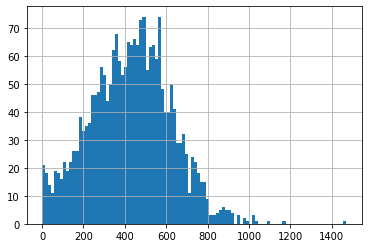

In [54]:
stat_info(smart_tariff_calls_data)

Пользователи на звонки за месяц тратят от 250 до 650 минут. Примерно от 8 минут до 22 минут в день. Среднее значение меньше мадианы, значит перед нами нормальное распределение с небольшой отрицательной скошенностью. Около 30% людей не хватает 500 минут в тарифе.

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
dtype: float64
Среднее значение: 33.37
Дисперсия: 796.96
Стандартное отклонение: 28.23


[33.36905829596412, 796.9552557301129, 28.230395954185852]

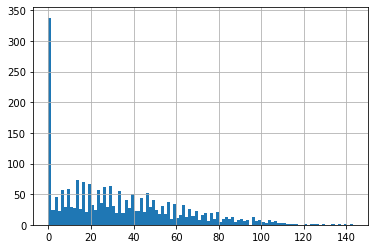

In [55]:
stat_info(smart_tariff_message_data)

Очень много пользователей не используют смс. Уберем из выборки все 0 значения и сравним гистограммы.

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
dtype: float64
Среднее значение: 38.72
Дисперсия: 717.59
Стандартное отклонение: 26.79


[38.71644120707596, 717.5942011753547, 26.787948804926344]

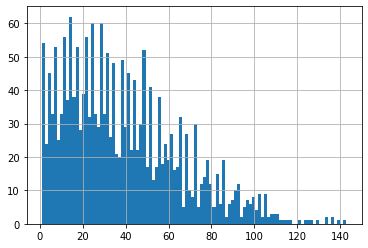

In [56]:
stat_info(smart_tariff_message_data[smart_tariff_message_data > 0])

Клиенты используют смс до 50 штук в месяц, что является по 1-2 в день. Здесь заментна положительная скошенность нормального распределения.

count     2230.000000
mean     16229.903139
std       5888.523413
min          0.000000
25%      12651.500000
50%      16538.000000
75%      20077.250000
max      38627.000000
dtype: float64
Среднее значение: 16229.90
Дисперсия: 34674707.98
Стандартное отклонение: 5888.52


[16229.903139013453, 34674707.98074385, 5888.523412600467]

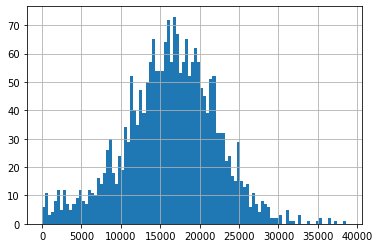

In [57]:
stat_info(smart_tariff_internet_data)

Данные имеют нормальное распределение, симметричного типа. Пользовтели в основном тратили от 12000 до 22000 МБ. Посмотрим на распределение значений в ГБ.

count    2230.000000
mean       16.360538
std         5.767443
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
dtype: float64
Среднее значение: 16.36
Дисперсия: 33.26
Стандартное отклонение: 5.77


[16.36053811659193, 33.263403927438354, 5.767443448135261]

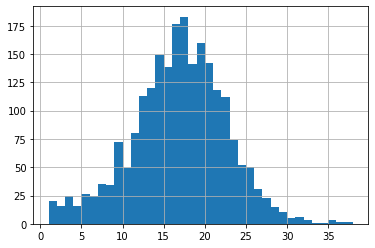

In [58]:
stat_info((smart_tariff_internet_data//1024)+1)

В данном виде ситуация похожая - от 12 до 22 ГБ. Имеется отрицательная скошенность из-за формата оценки потраченных ГБ оператором.

count    2230.000000
mean     1171.621973
std       744.658790
min       550.000000
25%       553.000000
50%       950.000000
75%      1553.000000
max      5252.000000
dtype: float64
Среднее значение: 1171.62
Дисперсия: 554516.71
Стандартное отклонение: 744.66


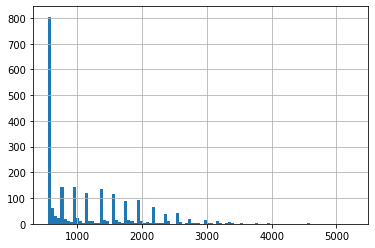

In [59]:
smart_mean, smart_var, smart_st_dev = stat_info(smart_tariff_fee_data)

count    1676.000000
mean     1377.098449
std       753.571703
min       553.000000
25%       750.000000
50%      1153.000000
75%      1779.250000
max      5252.000000
dtype: float64
Среднее значение: 1377.10
Дисперсия: 567870.31
Стандартное отклонение: 753.57


[1377.0984486873508, 567870.3108990846, 753.5717025599386]

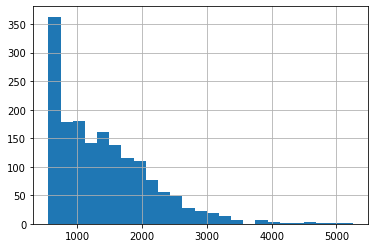

In [60]:
stat_info(smart_tariff_fee_data[smart_tariff_fee_data > 550], bins=25)

Перейдем к данным по тарифу Ultra.

count     986.000000
mean      540.231237
std       326.028527
min         0.000000
25%       291.250000
50%       531.500000
75%       772.500000
max      1727.000000
dtype: float64
Среднее значение: 540.23
Дисперсия: 106294.60
Стандартное отклонение: 326.03


[540.2312373225152, 106294.60028212231, 326.0285267919393]

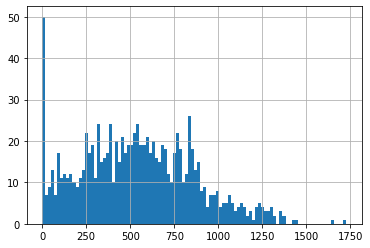

In [61]:
stat_info(ultra_tariff_calls_data)

count     951.000000
mean      560.113565
std       314.742170
min         1.000000
25%       318.000000
50%       544.000000
75%       776.500000
max      1727.000000
dtype: float64
Среднее значение: 560.11
Дисперсия: 99062.63
Стандартное отклонение: 314.74


[560.1135646687698, 99062.63340527976, 314.74216972830277]

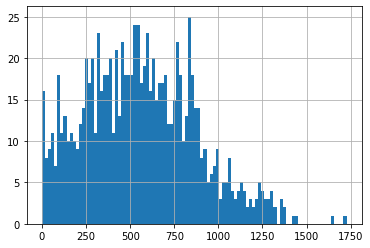

In [62]:
stat_info(ultra_tariff_calls_data[ultra_tariff_calls_data > 0])

Пользователи данного тарифа в осноном говорят от 250 до 900 минут. Это в разы меньше, чем предоставлено по тарифу. Нормальное распределение имеет положительную скошенность.

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
dtype: float64
Среднее значение: 49.31
Дисперсия: 2285.42
Стандартное отклонение: 47.81


[49.31338742393509, 2285.4174246558414, 47.80603962530092]

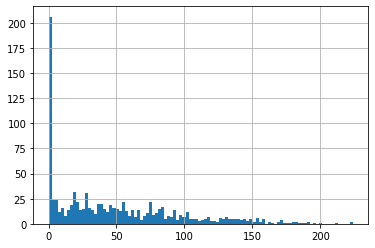

In [63]:
stat_info(ultra_tariff_message_data)

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
dtype: float64
Среднее значение: 61.16
Дисперсия: 2109.66
Стандартное отклонение: 45.93


[61.161006289308176, 2109.6591828652, 45.931026364160424]

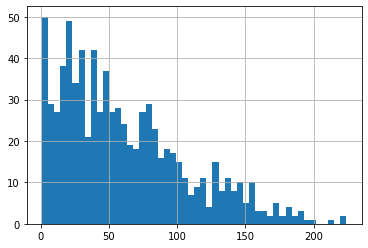

In [64]:
stat_info(ultra_tariff_message_data[ultra_tariff_message_data > 0], bins=50)

Пользователи отправляют до 75 сообщений в месяц, что в разы меньше предложенного в тарифе. Нормальное распределение имеет положительную скошенность.

count      986.000000
mean     19468.938134
std      10111.047371
min          0.000000
25%      11761.500000
50%      19320.500000
75%      26863.000000
max      49793.000000
dtype: float64
Среднее значение: 19468.94
Дисперсия: 102233278.94
Стандартное отклонение: 10111.05


[19468.93813387424, 102233278.94337682, 10111.047371235922]

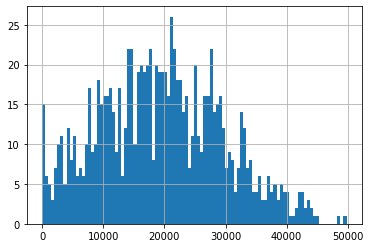

In [65]:
stat_info(ultra_tariff_internet_data)

Пользователи в основном тратят от 9000 до 30000 МБ. Скошенность почти отсутсвует, нормальное распределение похоже на симметричное.

count    986.000000
mean      19.522312
std        9.856020
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
dtype: float64
Среднее значение: 19.52
Дисперсия: 97.14
Стандартное отклонение: 9.86


[19.52231237322515, 97.14112601805995, 9.856019785798928]

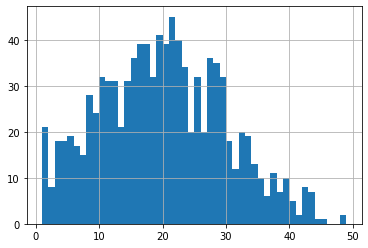

In [66]:
stat_info((ultra_tariff_internet_data//1024)+1)

При масштабе в ГБ ситуация похожа - от 8 до 30 гб.

count     986.000000
mean     2070.943205
std       378.629673
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
dtype: float64
Среднее значение: 2070.94
Дисперсия: 143360.43
Стандартное отклонение: 378.63


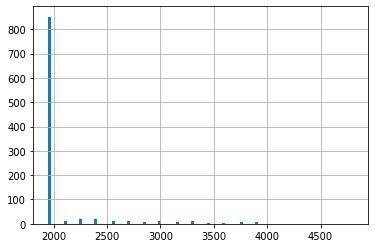

In [67]:
ultra_mean, ultra_var, ultra_st_dev = stat_info(ultra_tariff_fee_data)

count     134.000000
mean     2839.925373
std       610.120777
min      2100.000000
25%      2400.000000
50%      2700.000000
75%      3300.000000
max      4800.000000
dtype: float64
Среднее значение: 2839.93
Дисперсия: 372247.36
Стандартное отклонение: 610.12


[2839.9253731343283, 372247.3628100101, 610.120777231861]

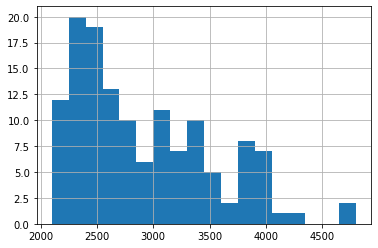

In [68]:
stat_info(ultra_tariff_fee_data[ultra_tariff_fee_data > 1950], bins=18)

Оценим процент пользователей, превышающих бесплатные лимиты.

In [69]:
print('Пользователи тарифа Smart.')
print('Процент пользователей, превышающих лимит по минутам - {:.2%}'.format(
        smart_tariff_calls_data[smart_tariff_calls_data > 500].shape[0]/smart_tariff_calls_data.shape[0]))
print('Процент пользователей, превышающих лимит по смс - {:.2%}'.format(
        smart_tariff_message_data[smart_tariff_message_data > 50].shape[0]/smart_tariff_message_data.shape[0]))
print('Процент пользователей, превышающих лимит по МБ - {:.2%}'.format(
        smart_tariff_internet_data[smart_tariff_internet_data > 15360].shape[0]/smart_tariff_internet_data.shape[0]))
print('Процент пользователей, платящих больше абонентской платы - {:.2%}'.format(
        smart_tariff_fee_data[smart_tariff_fee_data > 550].shape[0]/smart_tariff_fee_data.shape[0]))
print()
print('Пользователи тарифа Ultra.')
print('Процент пользователей, превышающих лимит по минутам - {:.2%}'.format(
        ultra_tariff_calls_data[ultra_tariff_calls_data > 3000].shape[0]/ultra_tariff_calls_data.shape[0]))
print('Процент пользователей, превышающих лимит по смс - {:.2%}'.format(
        ultra_tariff_message_data[ultra_tariff_message_data > 1000].shape[0]/ultra_tariff_message_data.shape[0]))
print('Процент пользователей, превышающих лимит по МБ - {:.2%}'.format(
        ultra_tariff_internet_data[ultra_tariff_internet_data > 30720].shape[0]/ultra_tariff_internet_data.shape[0]))
print('Процент пользователей, платящих больше абонентской платы - {:.2%}'.format(
        ultra_tariff_fee_data[ultra_tariff_fee_data > 1950].shape[0]/ultra_tariff_fee_data.shape[0]))

Пользователи тарифа Smart.
Процент пользователей, превышающих лимит по минутам - 36.37%
Процент пользователей, превышающих лимит по смс - 25.29%
Процент пользователей, превышающих лимит по МБ - 58.74%
Процент пользователей, платящих больше абонентской платы - 75.16%

Пользователи тарифа Ultra.
Процент пользователей, превышающих лимит по минутам - 0.00%
Процент пользователей, превышающих лимит по смс - 0.00%
Процент пользователей, превышающих лимит по МБ - 13.59%
Процент пользователей, платящих больше абонентской платы - 13.59%


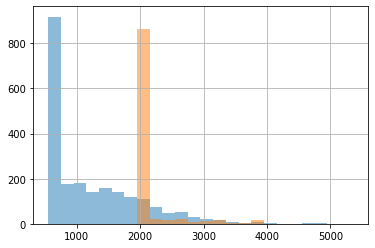

In [70]:
smart_tariff_fee_data.hist(bins=[550+200*i for i in range(0,25)], alpha=0.5)
ultra_tariff_fee_data.hist(bins=[1950+200*i for i in range(0,18)], alpha=0.5)

### Вывод по шагу 3

По проделанной работе можно сделать следующие выводы:

По пользователям тарифа Smart:

- Около 36.37% пользователей превышают данный пакетом лимит в 500 минут.
- Около 25.29% пользователям недостаточно 50 сообщений в месяц.
- Около 58.74% пользователей использую больше 15 ГБ трафика интернета в месяц.
- Результатом использования сверх бесплатного лимита является ситуация с большой оплатой за месяц. Рекордная 5252 рубля. Самой значимой затратой является пакет трафика на месяц. По гистограмме видны шаги в 200 рублей. 75.16% пользователей платят больше 550 рублей

По пользователям тарифа Ultra:

- Пользователи не превышают лимиты по количеству минут и смс в месяц.
- Около 13.59% перерасходуют лимит по интернету.
- Получается плата за месяц выше только по причине интернета. Это видно по шагам в 150 рублей на гистограмме

## Шаг 4. Проверка гипотез

Стоит задача проверить две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Начнем с оценки средней выручки.

Составим всю выборку оплате тарифов и найдем ее среднее значение, дисперсию и стандартное отклонение.

In [71]:
all_fee_data = pd.Series(fill_specific_data(full_data_users
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
all_fee_data

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
3211    1750
3212     550
3213    1150
3214    1180
3215     601
Length: 3216, dtype: int64

count    3216.000000
mean     1447.346704
std       774.835549
min       550.000000
25%       595.000000
50%      1550.000000
75%      1950.000000
max      5252.000000
dtype: float64
Среднее значение: 1447.35
Дисперсия: 600370.13
Стандартное отклонение: 774.84


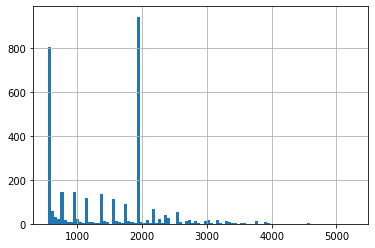

In [72]:
all_mean, all_var, all_st_dev = stat_info(all_fee_data)

In [73]:
print("Данные по вcей выборке: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(all_mean, all_var, all_st_dev))
print("Данные по выборке Smart: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(smart_mean, smart_var, smart_st_dev))
print("Данные по выборке Ultra: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(ultra_mean, ultra_var, ultra_st_dev))

Данные по вcей выборке: среднее 1447.35, дисперсия  600370.13 и станд. отклонение 774.84
Данные по выборке Smart: среднее 1171.62, дисперсия  554516.71 и станд. отклонение 744.66
Данные по выборке Ultra: среднее 2070.94, дисперсия  143360.43 и станд. отклонение 378.63


Нулевая гипотеза для первой задачи гласит: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна".

Альтернативаня гипотеза первой задачи: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу". 

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве средней выручи верно.

In [74]:
ultra_tariff_fee_data

0      1950
1      1950
2      1950
3      1950
4      1950
       ... 
981    1950
982    2400
983    1950
984    3300
985    1950
Length: 986, dtype: int64

In [75]:
alpha = .01

results = st.ttest_ind(smart_tariff_fee_data, ultra_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.958146555624543e-238
Отвергаем нулевую гипотезу


Выручка по тарифам отличается.

Выдвинем предположение о равенстве выборки по каждому тарифу с генеральной совокупностью.

При сравнении статистических данных выборок с генеральной выборкой видно, что нормальное распределения каждого тарифа отличаются друг от друга.

In [76]:
alpha = .01

results = st.ttest_ind(all_fee_data, ultra_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.091373988806604e-123
Отвергаем нулевую гипотезу


In [77]:
alpha = .01

results = st.ttest_ind(smart_tariff_fee_data, all_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.728272976875016e-39
Отвергаем нулевую гипотезу


Выборки по тарифам отличатся от генеральной. Это значит, тарифы вносят ощутимый вклад в среднюю оплату за месяц.

Подготовим данные для второй задачи. Создадим выборку для города Москва и всех остальных регионов.

In [78]:
moscow_fee_data = pd.Series(fill_specific_data(full_data_users[full_data_users['city'] == 'Москва']
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
moscow_fee_data

0      1350
1       550
2      1950
3      1950
4      1950
       ... 
606     950
607     550
608    1750
609    1350
610     750
Length: 611, dtype: int64

In [79]:
other_cities_fee_data = pd.Series(fill_specific_data(full_data_users[full_data_users['city'] != 'Москва']
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
other_cities_fee_data

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
2600    1750
2601     550
2602    1150
2603    1180
2604     601
Length: 2605, dtype: int64

count     611.000000
mean     1477.358429
std       748.491993
min       550.000000
25%       610.000000
50%      1750.000000
75%      1950.000000
max      4607.000000
dtype: float64
Среднее значение: 1477.36
Дисперсия: 560240.26
Стандартное отклонение: 748.49


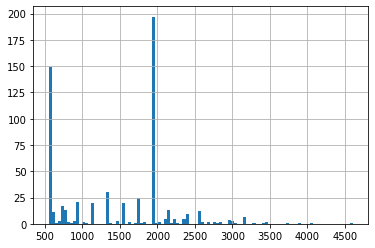

In [80]:
moscow_mean, moscow_var, moscow_st_dev =stat_info(moscow_fee_data)

count    2605.000000
mean     1440.307486
std       780.858755
min       550.000000
25%       595.000000
50%      1550.000000
75%      1950.000000
max      5252.000000
dtype: float64
Среднее значение: 1440.31
Дисперсия: 609740.40
Стандартное отклонение: 780.86


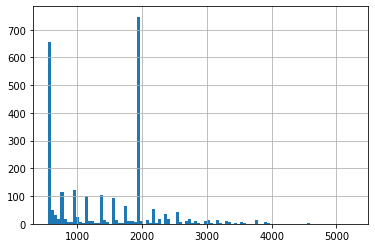

In [81]:
other_cities_mean, other_cities_var, other_cities_st_dev =stat_info(other_cities_fee_data)

In [82]:
print("Данные по вcей выборке: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(all_mean, all_var, all_st_dev))
print("Данные по выборке города Москва: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(moscow_mean, moscow_var, moscow_st_dev))
print("Данные по выборке остальных городов: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(other_cities_mean, other_cities_var, other_cities_st_dev))

Данные по вcей выборке: среднее 1447.35, дисперсия  600370.13 и станд. отклонение 774.84
Данные по выборке города Москва: среднее 1477.36, дисперсия  560240.26 и станд. отклонение 748.49
Данные по выборке остальных городов: среднее 1440.31, дисперсия  609740.40 и станд. отклонение 780.86


Нулевая гипотеза для второй задачи гласит: "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов".

Альтернативаня гипотеза второй задачи: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу". 

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве средней выручи верно.

In [83]:
alpha = .01

results = st.ttest_ind(moscow_fee_data, other_cities_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28749358178262147
Не получилось отвергнуть нулевую гипотезу


Данный ответ означает, разницы между средней выручки Москвы и остальных городов нет. 

При сравнении статистических данных по выборкам с генеральной выборкой можно увидить, что данные соотвествуют нормальному распределению в независимсости от выбранного города.

Проверим по каждому тарифу подтверждается ли нулевая гипотеза первой задачи по городу Москва.

In [84]:
moscow_smart_tariff_fee_data = pd.Series(fill_specific_data(full_data_users.query('city == "Москва" and tariff == "smart"')
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
moscow_smart_tariff_fee_data

0      1350
1       550
2       550
3      1150
4       553
       ... 
381     950
382     550
383    1750
384    1350
385     750
Length: 386, dtype: int64

In [85]:
moscow_ultra_tariff_fee_data = pd.Series(fill_specific_data(full_data_users.query('city == "Москва" and tariff == "ultra"')
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
moscow_ultra_tariff_fee_data

0      1950
1      1950
2      1950
3      1950
4      1950
       ... 
220    1950
221    1950
222    1950
223    1950
224    1950
Length: 225, dtype: int64

In [86]:
alpha = .01

results = st.ttest_ind(moscow_smart_tariff_fee_data, moscow_ultra_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1612137552930624e-63
Отвергаем нулевую гипотезу


Повторим те же действия для остальных городов.

In [87]:
other_cities_smart_tariff_fee_data = pd.Series(fill_specific_data(full_data_users.query('city != "Москва" and tariff == "smart"')
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
other_cities_smart_tariff_fee_data

0        550
1       1150
2       1550
3        950
4        550
        ... 
1839    1750
1840     550
1841    1150
1842    1180
1843     601
Length: 1844, dtype: int64

In [88]:
other_cities_ultra_tariff_fee_data = pd.Series(fill_specific_data(full_data_users.query('city != "Москва" and tariff == "ultra"')
                                    .loc[:,['city','month_1','month_2',
                                   'month_3','month_4','month_5',
                                   'month_6','month_7', 'month_8',
                                   'month_9', 'month_10','month_11','month_12']], 'total_fee'))
other_cities_ultra_tariff_fee_data

0      1950
1      1950
2      1950
3      1950
4      1950
       ... 
756    1950
757    2400
758    1950
759    3300
760    1950
Length: 761, dtype: int64

In [89]:
alpha = .01

results = st.ttest_ind(other_cities_smart_tariff_fee_data, other_cities_ultra_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.018658072452565e-178
Отвергаем нулевую гипотезу


Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" подтверждается не только для Москвы, но и для всей страны.

Проведем последние сравнения внутри тарифов между городами.

count     386.000000
mean     1128.797927
std       695.952988
min       550.000000
25%       550.000000
50%       765.000000
75%      1550.000000
max      4607.000000
dtype: float64
Среднее значение: 1128.80
Дисперсия: 484350.56
Стандартное отклонение: 695.95


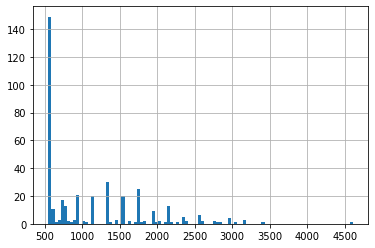

In [90]:
smart_moscow_mean, smart_moscow_var, smart_moscow_st_dev =stat_info(moscow_smart_tariff_fee_data)

count     225.000000
mean     2075.333333
std       353.051747
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4050.000000
dtype: float64
Среднее значение: 2075.33
Дисперсия: 124645.54
Стандартное отклонение: 353.05


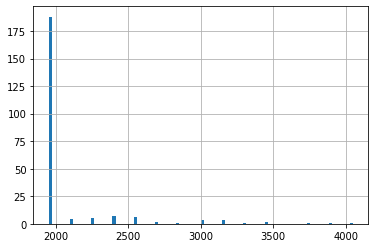

In [91]:
ultra_moscow_mean, ultra_moscow_var, ultra_moscow_st_dev =stat_info(moscow_ultra_tariff_fee_data)

count    1844.000000
mean     1180.586226
std       754.327980
min       550.000000
25%       553.000000
50%       950.000000
75%      1553.000000
max      5252.000000
dtype: float64
Среднее значение: 1180.59
Дисперсия: 569010.70
Стандартное отклонение: 754.33


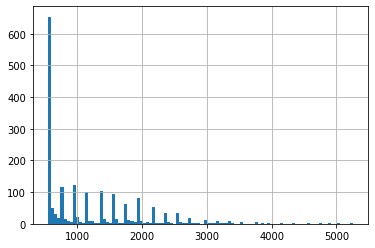

In [92]:
smart_other_cities_mean, smart_other_cities_var, smart_other_cities_st_dev =stat_info(other_cities_smart_tariff_fee_data)

count     761.000000
mean     2069.645204
std       386.079833
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
dtype: float64
Среднее значение: 2069.65
Дисперсия: 149057.64
Стандартное отклонение: 386.08


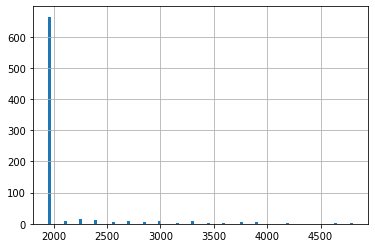

In [93]:
ultra_other_cities_mean, ultra_other_cities_var, ultra_other_cities_st_dev =stat_info(other_cities_ultra_tariff_fee_data)

In [94]:
print("Данные по выборке Smart: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(smart_mean, smart_var, smart_st_dev))
print("Данные по выборке Smart в городе Москва: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(smart_moscow_mean, smart_moscow_var, smart_moscow_st_dev))
print("Данные по выборке Smart в остальных городах: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(smart_other_cities_mean, smart_other_cities_var, smart_other_cities_st_dev))

Данные по выборке Smart: среднее 1171.62, дисперсия  554516.71 и станд. отклонение 744.66
Данные по выборке Smart в городе Москва: среднее 1128.80, дисперсия  484350.56 и станд. отклонение 695.95
Данные по выборке Smart в остальных городах: среднее 1180.59, дисперсия  569010.70 и станд. отклонение 754.33


In [95]:
alpha = .01

results = st.ttest_ind(moscow_smart_tariff_fee_data, other_cities_smart_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.21412741115814168
Не получилось отвергнуть нулевую гипотезу


In [96]:
print("Данные по выборке Ultra: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(ultra_mean, ultra_var, ultra_st_dev))
print("Данные по выборке Ultra в городе Москва: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(ultra_moscow_mean, ultra_moscow_var, ultra_moscow_st_dev))
print("Данные по выборке Ultra в остальных городах: среднее {:.2f}, дисперсия  {:.2f} и станд. отклонение {:.2f}".format(ultra_other_cities_mean, ultra_other_cities_var, ultra_other_cities_st_dev))

Данные по выборке Ultra: среднее 2070.94, дисперсия  143360.43 и станд. отклонение 378.63
Данные по выборке Ultra в городе Москва: среднее 2075.33, дисперсия  124645.54 и станд. отклонение 353.05
Данные по выборке Ultra в остальных городах: среднее 2069.65, дисперсия  149057.64 и станд. отклонение 386.08


In [97]:
alpha = .01

results = st.ttest_ind(moscow_ultra_tariff_fee_data, other_cities_ultra_tariff_fee_data)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8431847612680233
Не получилось отвергнуть нулевую гипотезу


Гипотеза "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов" подтвердилась по каждому тарифу.

### Вывод по шагу 4

Были выдвинуты две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза 1 подтвердилась и говорит нам о том, что выручка по тарифамм отличается, но не известно в большую или меньшу сторону. По средней выручке можно предположить, что выручка по тарифу Ultra до 2 раз больше, чем от Smart.

Гипотеза 2 была опровергнута. Это значит, что нормальное распределение по выручке за месяц между городом Москва и остальной страной не отличается.

## Итоговый вывод

В ходе проделанной работы было выполнено:

1. Просмотрена каждая таблица и выявлены аномалии и связи между таблицами
2. Составлена общая таблица данных о пользователях сети
3. Заполнены пропуски и сменены типы данных для столцов
4. Добавлены необходимые серии для гипотез
5. Проведен сравнительный анализ пользователей тарифов 
6. Проверены гипотезы на возможное соотвествие

Предложенные тарифы сильно отличаются друг от друга и их выручка разнится. В первую очередь пользователи тарифа Smart чаще пользователей тарифа Ultra перерасходуют лимиты. Из-за это выручка по тарифу Smart может казаться большой.

Сравнение процента пользователей, которые не переходят за порог 25% для Smart и 86% для Ultra, говорит о том, что первый тариф не соответвует большинству пользователей практически по всем пунктам (более половины случаев переплат только за интернет). Второму тарифу слишком много лимита по минутам и смс и перерасход может быть только по интернету (14% пользователей).

В связи с этим и получилось по статистическому анализу, что распределения данных находяться на разных значениях выручки и не могут быть похожими друг на друга.

Разницы по местоположению пользователя нет как в общем, так и отдельно по тарифам. Средняя выручка за тариф не отличается.